# AJAY KUMAR (DATA MINING ASSIGN 6)

# Question 4 / program

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [41]:
# randomly chosen dataset
X = np.array([
    [0,8],
    [0,3],
    [6,2],
    [3,6],
    [5,3],
    [4,2],
    [-1,0],
    [2,7],])
 
# here we need to mention the number of clusters
# otherwise the result will be a single cluster
# containing all the data
clustering = AgglomerativeClustering(n_clusters = 2).fit(X)
 
# print the class labels
print(clustering.labels_)

[1 0 0 1 0 0 0 1]


In [42]:
X = np.array([
    [0,8],
    [0,3],
    [6,2],
    [3,6],
    [5,3],
    [4,2],
    [-1,0],
    [2,7],])

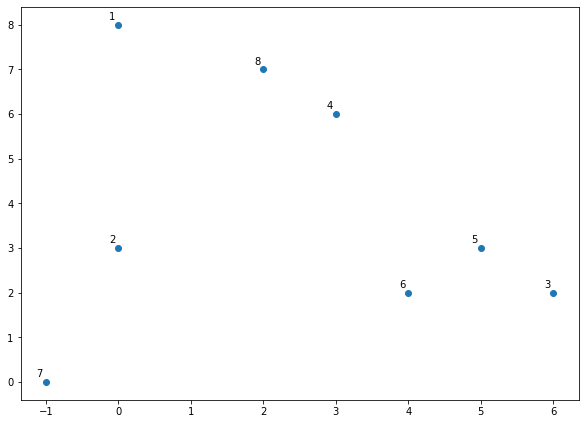

In [43]:
# visulising data

labels = range(1, 10)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

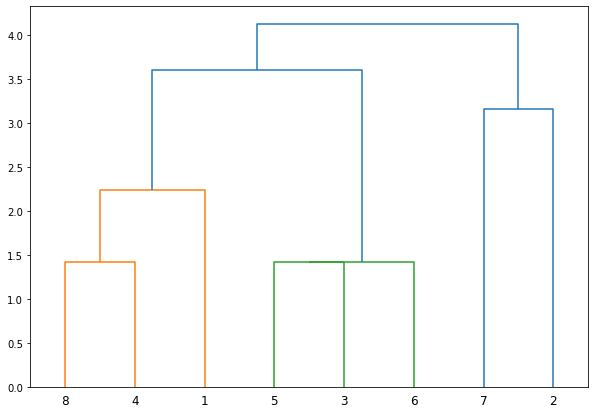

In [44]:
# ploting dendogram

linked = linkage(X, 'single')

labelList = range(1, 9)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

# Question 5 / program

5. Apply k means, hierarchical clustering and KSOM on Data 1 and Data 2. (No: of
clusters 3)
(a) Report the cluster centers for k means.
(b) Discuss the method used to prevent the initialization issues in k means.
(c) Plot the clusters.
(d) Plot J(c,µ) for k means.
(e) Apply KSOM visualization techniques.

In [53]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import pandas as pd


In [54]:
df = pd.read_csv("C:\\Users\\hp\\assign_6\\Data1.csv",header=None)

In [55]:
df

,0,1
0,0.171760,1.38070
1,1.304200,0.39963
2,0.296260,1.65620
3,0.950620,0.14257
4,1.674900,0.76618
...,...,...
595,0.012327,5.44000
596,0.510720,5.32800
597,0.775410,5.03800
598,-0.550190,5.07350


In [56]:
df.describe()

,0,1
count,600.000000,600.000000
mean,1.652682,3.997592
std,1.772153,2.236345
min,-0.983180,0.014485
25%,0.268725,1.446775
50%,0.988255,4.994850
75%,3.533975,5.702950
max,4.975200,6.940000


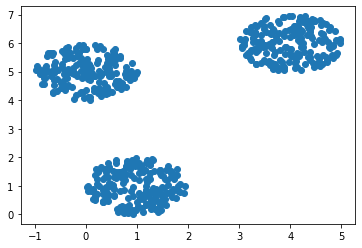

In [58]:
plt.scatter(df[0],df[1])

In [71]:
df.describe()

,0,1
count,600.000000,600.000000
mean,1.652682,3.997592
std,1.772153,2.236345
min,-0.983180,0.014485
25%,0.268725,1.446775
50%,0.988255,4.994850
75%,3.533975,5.702950
max,4.975200,6.940000


In [85]:
import numpy as np

def gaussian(data,mean,cov):
    l =[ ]
    data = np.array(data)
    d_cov = np.linalg.det(cov)
    den = 2*3.14*(d_cov)**0.5
    for x in data:
        a = np.array(x-mean)
        p = np.exp(np.linalg.multi_dot([a.T,np.linalg.inv(cov),a]))
        l.append(p)
    return np.array(l)/den
    
    
class Clustering():
    
    def __init__(self,X,n_clusters):
        self.mean = np.array(X.sample(n=n_clusters))
        X = np.array(X)
        self.k = n_clusters
        self.pi = np.ones(n_clusters)/n_clusters
        self.sample,self.feature = X.shape
        self.cov = np.zeros((self.k,self.feature,self.feature))
        self.data = X
        for i in range(self.k):
            self.cov[i] = np.eye(self.feature)
        self.z = np.zeros((self.sample, self.k))

    
    def fit(self,n_iters=20,eps=1e-8):
        
        for n in range(n_iters):
            old_mean = self.mean
            self.gamma = self.e_step()
            self.m_step()
#             y_p = model.predict()
            if n%2 ==0:    
                plt.scatter(df[0],df[1],c=model.predict())
                plt.scatter(model.mean[:,0],model.mean[:,1],marker='+',s=100,c='r')
                plt.show()
            if np.sum(np.square(self.mean-old_mean))<=eps:
                break
        print("Fitting Complete in ",n,"Iteration")
        
        
    def e_step(self):
        
        for i in range(self.k):
            self.z[:, i] = self.pi[i] * multivariate_normal.pdf(self.data, mean=self.mean[i], cov=self.cov[i])
        self.z /= self.z.sum(axis=1, keepdims=True)

    def m_step(self):
        
        sum_z = self.z.sum(axis=0)
        self.pi = sum_z / self.sample
        self.mean = np.matmul(self.z.T, self.data)
        self.mean /= sum_z[:, None]
        for i in range(self.k):
            j = np.expand_dims(self.data, axis=1) - self.mean[i]
            s = np.matmul(j.transpose([0, 2, 1]), j)
            self.cov[i] = np.matmul(s.transpose(1, 2, 0), self.z[:, i] )
            self.cov[i] /= sum_z[i]
    
    def predict(self):
        for i in range(self.k):
            self.z[:, i] = self.pi[i] * multivariate_normal.pdf(self.data, mean=self.mean[i], cov=self.cov[i])
        self.labels = np.argmax(self.z,axis=1)
        return self.labels

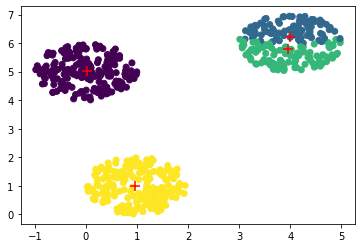

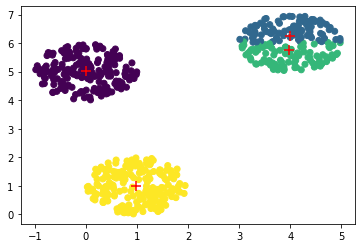

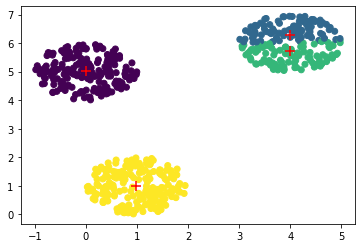

Fitting Complete in  4 Iteration


In [87]:
model = Clustering(df,4)
model.fit(5)

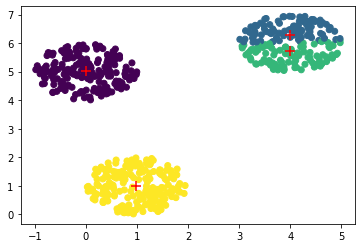

In [90]:

# ploting cluster


plt.scatter(df[0],df[1],c=model.predict())
plt.scatter(model.mean[:,0],model.mean[:,1],marker='+',s=100,c='r')